In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:title={'center':'Monthly Sales Trend'}, xlabel='Month'>

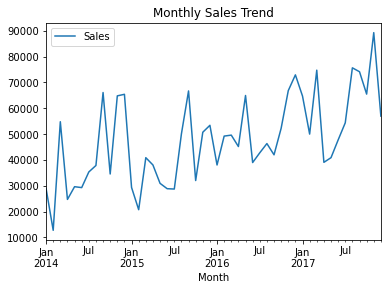

In [13]:
# Load your dataset
df = pd.read_csv("Online_Sale Report.csv", encoding='ISO-8859-1')


# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'Month-Year' column for grouping
df['Month'] = df['Order Date'].dt.to_period('M')

# Aggregate sales per month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Plot the trend (optional)
monthly_sales.plot(x='Month', y='Sales', title='Monthly Sales Trend')

In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,1.0,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016-08
1,2.0,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,2016-08
2,3.0,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016-12
3,4.0,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015-11
4,5.0,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,2015-11


In [15]:
#Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_sales)
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


In [17]:
df['Amount'] = df['Sales']

In [18]:
avg_profit = df['Profit'].mean()
print("Average Profit per Order:", avg_profit)
monthly_quantity = df.groupby('Month')['Quantity'].sum()
monthly_amount = df.groupby('Month')['Amount'].sum()

Average Profit per Order: 28.656896307784802
